In [2]:
import numpy as np
import pandas as pd
import os
import specutils
import matplotlib.pyplot as plt
import astropy
import astropy.units as units

import FunctionLib as F

In [3]:
DJA_Catalog_DataFrame=pd.read_csv('./DJACatalog.csv')

DJA_File_Path=os.path.expanduser('~/DJAData/')
if os.path.exists(DJA_File_Path):
    DJA_File_List=np.array(os.listdir(DJA_File_Path))
print('Number of files in DJA directory:', len(DJA_File_List))


Number of files in DJA directory: 18506


In [5]:
DJA_File_List=[f for f in os.listdir('./') if f.startswith('goodsn')]
print('Number of files in current directory:', len(DJA_File_List))

Number of files in current directory: 3


In [17]:
redshift=F.Load_Redshift(DJA_Catalog_DataFrame, DJA_File_List[2])
print('Redshift:', redshift)

Redshift: 4.7275


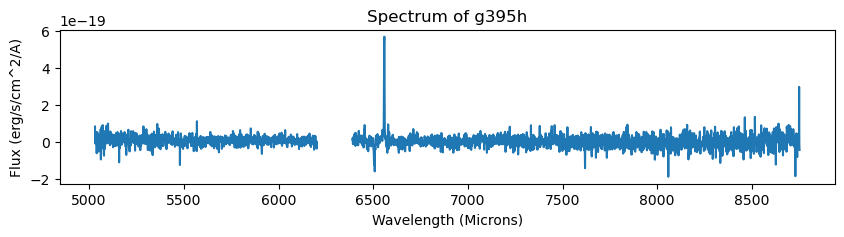

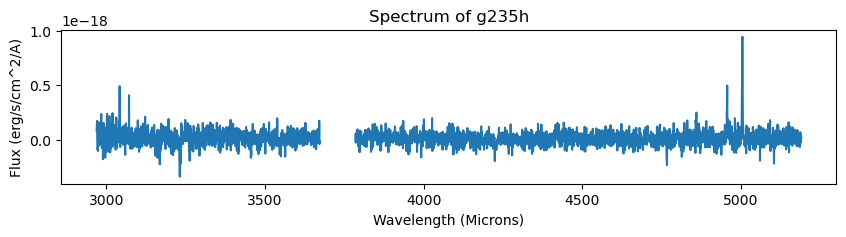

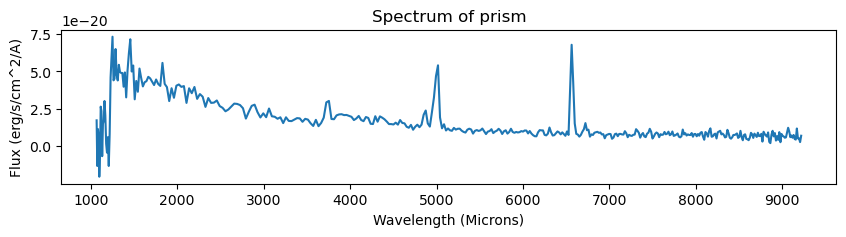

In [21]:
for File_Name in DJA_File_List:
    if File_Name.endswith('.fits'):
        grating=File_Name.split('_')[1].split('-')[0]
        spectrum=F.Load_N_Rescale_Spectra(File_Name)
        spectrum=F.Calibrate_Spectra_To_RestFrame(spectrum, redshift)
        plt.figure(figsize=(10, 2))
        plt.plot(spectrum.wavelength.value, spectrum.flux.value)
        plt.xlabel('Wavelength (Microns)')
        plt.ylabel('Flux (erg/s/cm^2/A)')
        plt.title('Spectrum of ' + grating)

In [6]:
a=F.Load_N_Rescale_Spectra(DJA_File_List[0])

Text(0.5, 1.0, '$F_{\\lambda}$')

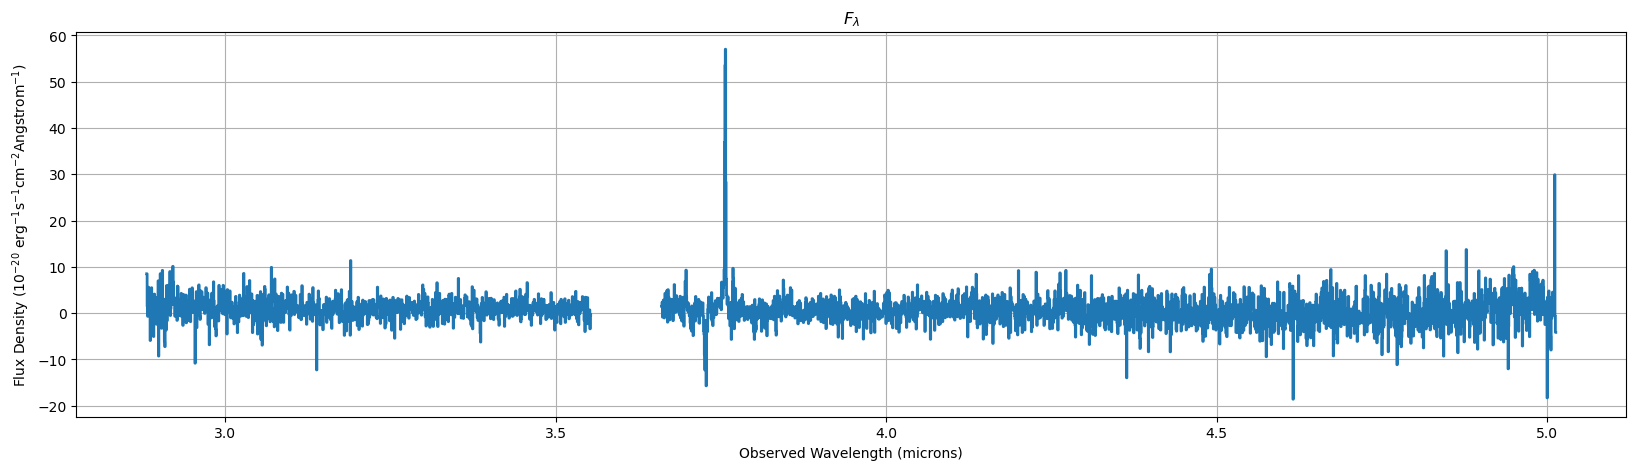

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(a.spectral_axis.value,
         a.flux.value*1e20,
         '-',drawstyle='steps-mid',linewidth=2)
plt.xlabel('Observed Wavelength (microns)')
plt.ylabel('Flux Density ($10^{-20}$ erg$^{-1}$s$^{-1}$cm$^{-2}$Angstrom$^{-1}$)')
plt.grid()
plt.title('$F_{\\lambda}$')

Redshift: 4.7006


In [7]:
restframe=F.Calibrate_Spectra_To_RestFrame(a, redshift)
restframe

<Spectrum1D(flux=[nan ... nan] erg / (Angstrom s cm2) (shape=(435,), mean=0.00000 erg / (Angstrom s cm2)); spectral_axis=<SpectralAxis [0.10174367 0.10239012 0.10304843 ... 0.93367359 0.93491283 0.93615024] micron> (length=435))>

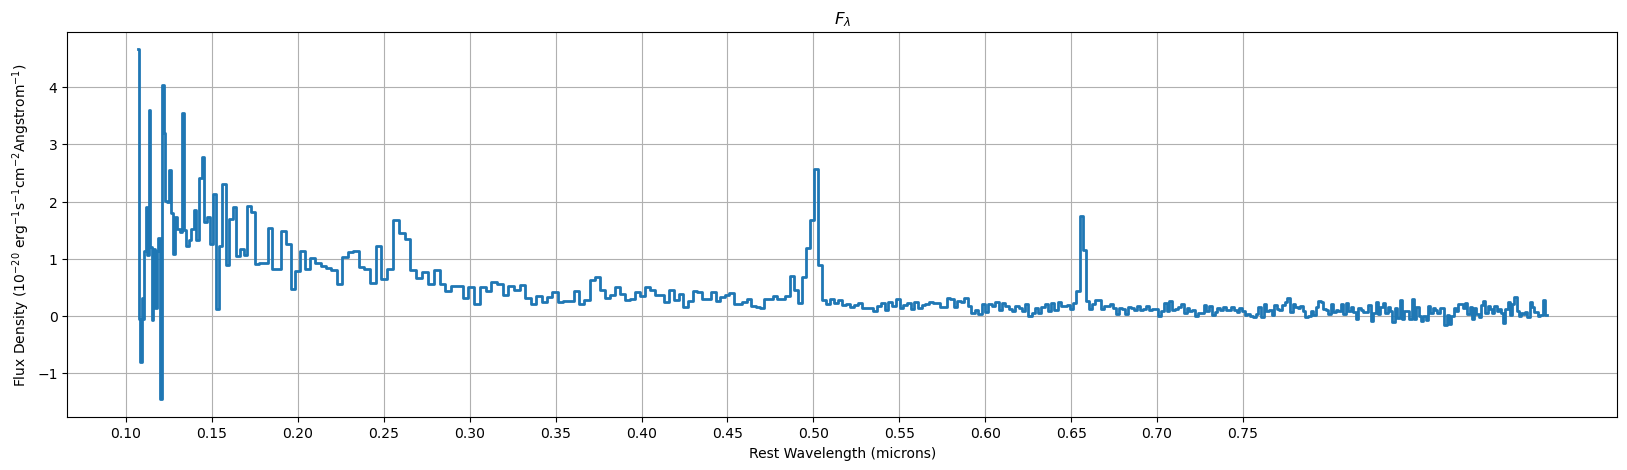

In [8]:

plt.figure(figsize=(20, 5))
plt.plot(restframe.spectral_axis.value,
         restframe.flux.value*1e20,
         '-',drawstyle='steps-mid',linewidth=2)
plt.xlabel('Rest Wavelength (microns)')
plt.ylabel('Flux Density ($10^{-20}$ erg$^{-1}$s$^{-1}$cm$^{-2}$Angstrom$^{-1}$)')
plt.grid()
plt.xticks(np.arange(0.1, 0.8, 0.05))
plt.title('$F_{\\lambda}$')
plt.show()


In [ ]:
def Extract_Emission_Line(SpecUtilsSpectrum1D, Line_Wavelength, Detect_Window_Width=1000*units.angstrom):
    """
    This function searches for a given emission line with the given wavelength and the width of the detection window from the given spectrum.

    Parameters
    ----------
    SpecUtilsSpectrum1D : specutils.Spectrum1D
        The spectrum from which to extract the emission line.
    Line_Wavelength : astropy.units.Quantity
        The wavelength of the emission line to extract.
    Detect_Window_Width : astropy.units.Quantity
        The width of the detection window around the line wavelength. Default is 1000 Angstroms.
    """

    Line_Wavelength=Line_Wavelength.to(SpecUtilsSpectrum1D.spectral_axis.unit)
    Line_Wavelength=Line_Wavelength.value

    Detect_Window_Width=Detect_Window_Width.to(SpecUtilsSpectrum1D.spectral_axis.unit)
    Detect_Window_Width=Detect_Window_Width.value

    # Find the index of the line wavelength in the spectrum
    Line_Index=np.argmin(np.abs(SpecUtilsSpectrum1D.spectral_axis.value-Line_Wavelength))

_1211_2081.spec.fits